# Text Mining - kolokwium 1
##### Authors: Antoni Perużyński 

In [1]:
#!pip install -U nltk
#!pip install tabulate

In [2]:
#pip install tensorflow

## Imports

In [3]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
#from services import stemming, stop_word, txt_cleaning
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
#from services.text_tokenizer import text_tokenizer
#from services.text_tokenizer import text_tokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

from sklearn import metrics, __all__
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

#from functions import True_without_Fake, Fake_without_True, TF_IDF, Binary_weight
#from services.text_tokenizer import text_tokenizer
#from services.vectorizing import vectorizing, vectorizing_voc

import tensorflow as tf

from wordcloud import WordCloud

import sklearn as sk
from sklearn.neural_network import MLPClassifier

from PIL import Image

## Text cleaning

### Bag of words

Creating function making $Bag~of~words$ to make map of words.

In [4]:
def create_bow(text: list) -> list:
    word2count = {}
    for word in text:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1
    return word2count

# Preparing for data cleaning

We created the following functions to clear data:
    <li>stopwords_function() - to clear data from stopwords</li>
    <li>stemming_function() - to stem data </li>
    <li>clean_text() - to clean data from emoticons, numbers, html links, whitespaces and lowering letters</li>
    <li>text_tokenizer() - recall all previous functions and deleting words with lenght lower than 3 </li>

### Stop words

In [5]:
def stopwords_function(text: str) -> str:

    stop_words = stopwords.words('english')
    #word_token = word_tokenize(text)
    cleaned = [w for w in text if w not in stop_words]
    return " ".join(cleaned)

### Stemming

In [6]:
def stemming_function(text: str) -> list:
    stemming = PorterStemmer()
    txt_list = list(text.split(" "))
    stemmed_txt = []
    for w in txt_list:
        stemmed_txt.append(stemming.stem(w))
    return stemmed_txt

### Text cleaning

In [7]:
def clean_text(txt: str) -> str:
    find_emoticons = re.findall(r"[:;][-]?[/\|\)\(><D]", txt)
    txt_low = txt.lower()
    delete_numbers = re.sub("[0-9]+", "", txt_low)
    delete_html = re.sub(r'<.*?>', '', delete_numbers)
    delete_punctuation = re.sub(r"[^\w\s]", " ", delete_html)
    delete_whitespace = delete_punctuation.strip()
    clean_txt = delete_whitespace + ' '.join(find_emoticons)
    return clean_txt

### Text tokenizer

In [8]:
def text_tokenizer(text: str):

    cleaned_text = clean_text(text)
    tokens = word_tokenize(cleaned_text)
    without_stopwords =stopwords_function(tokens)
    stemmed_text = stemming_function(without_stopwords)

    return [w for w in stemmed_text if len(w) > 3]

# Vectorizing

Function $vectorizing\_voc()$ is taking one more argument (vocabulary) to vectorize dataset.

In [9]:
def vectorizing(sample):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer)
    X_transform_sample = vectorizer1.fit_transform(sample)
    titles_sample = (vectorizer1.get_feature_names())
    array = X_transform_sample.toarray()
    return array, titles_sample

def vectorizing_voc(sample, vocabulary):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer, vocabulary=vocabulary)
    X_transform_sample = vectorizer1.fit_transform(sample)
    titles_sample = (vectorizer1.get_feature_names())
    array = X_transform_sample.toarray()
    return array, titles_sample

### Top10 setA minus setB

Function used to take top 10 tokens which appear only in first set.

In [10]:
def Top10onlyInA(sample_A, sample_B, tit, jpg_name):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer)

    X_transform_sample_true = vectorizer1.fit_transform(sample_A)
    titles_A = (vectorizer1.get_feature_names())

    X_transform_sample_fake = vectorizer1.fit_transform(sample_B)
    titles_B = (vectorizer1.get_feature_names())

    AwithoutB = [x for x in titles_A if x not in titles_B]

    vectorizer = CountVectorizer(tokenizer=text_tokenizer, vocabulary=AwithoutB)
    X_transform_sample = vectorizer.fit_transform(sample_A)

    titles = (vectorizer.get_feature_names())  # Get all tokens
    array = X_transform_sample.toarray() # Table [1,0,0....] is token in document

    print("Display top 10 tokens")
    column_sum = np.sum(array, axis=0)  # quantity of token in all documents
    max_val_col = np.argpartition(column_sum, -10)[-10:]  # Indexes of top 10 tokens
    top_10_quantity = column_sum[max_val_col]  # Quantity of top 10 tokens
    #top_10_tokens = titles[max_val_col]
    #print(top_10_tokens)
    
    top_10_tokens = []
    for i in max_val_col:
        top_10_tokens.append(titles[i])
    
    # Bar plot

    df_1 = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})
    df_1 = df_1.sort_values(by="quantity")
    plot = df_1.plot(kind='barh', x='titles', y='quantity',color='#833864', title=tit)
    fig = plot.get_figure()
    #fig.savefig(jpg_name+'.png')
    plt.show()

    print(tabulate(df_1, headers='keys', tablefmt='psql'))  # Pretty table

    return

### Top10_OneSet

Function used to take top 10 tokens in set.

In [11]:
def Top10_OneSet(sample, tit, jpg_name):
  
    vectorizer = CountVectorizer(tokenizer=text_tokenizer)
    X_transform_sample = vectorizer.fit_transform(sample)

    titles = (vectorizer.get_feature_names())  # Get all tokens
    array = X_transform_sample.toarray()

    """
    Display top 10 tokens
    """
    print("Display top 10 tokens")
    column_sum = np.sum(array, axis=0)  # Sum by column existance of token in row
    max_val_col = np.argpartition(column_sum, -10)[-10:]  # Indexes of top 10 tokens
    top_10_quantity = column_sum[max_val_col]  # Quantity of top 10 tokens
    
    #top_10_tokens = titles[max_val_col]
    top_10_tokens = []
    for i in max_val_col:
        top_10_tokens.append(titles[i])
 
    print(top_10_tokens)

    # Bar plot of quantity top 10 tokens in true news

    df_1 = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})
    df_1 = df_1.sort_values(by="quantity")
    plot = df_1.plot(kind='barh', x='titles', y='quantity', color='#833864',
                     title=tit)
    fig = plot.get_figure()
    #fig.savefig(jpg_name+'.png')
    plt.show()

    print(tabulate(df_1, headers='keys', tablefmt='psql'))  # Pretty table

    return

### TF_IDF

In [12]:
def TF_IDF(sample):
    vectorizer_tf = TfidfVectorizer(tokenizer=text_tokenizer)
    X_transform_sample_tf = vectorizer_tf.fit_transform(sample)
    titles = (vectorizer_tf.get_feature_names())
    array_tf = X_transform_sample_tf.toarray()

    # Display top 10 most important tokens

    print("Display top 10 most important tokens")
    tf_col_sum = np.mean(array_tf, axis=0)
    max_tf_val_col = np.argpartition(tf_col_sum, -10)[-10:]
    top_10_tf_quantity = tf_col_sum[max_tf_val_col]
    #top_10_tf_tokens = titles[max_tf_val_col]
    
    top_10_tf_tokens = []
    for i in max_tf_val_col:
        top_10_tf_tokens.append(titles[i])
 
    print(top_10_tf_tokens)

    # ''' Bar plot of TF-IDF indexes top 10 most important tokens in true news'''

    df_2 = pd.DataFrame({'titles': top_10_tf_tokens, 'TFIDF': top_10_tf_quantity})
    df_2 = df_2.sort_values(by="TFIDF")
    plot2 = df_2.plot(kind='barh', x='titles', y='TFIDF', color='#c2619b' ,title="Crucial tokens based on TF-IDF")
    fig2 = plot2.get_figure()
    #fig2.savefig('TF_IDF.png')
    plt.show()
    print(tabulate(df_2, headers='keys', tablefmt='psql'))  # Pretty table

    return

### Binary weight

In [13]:
def Binary_weight(sample):
    vectorizer = CountVectorizer(tokenizer=text_tokenizer, binary=True)
    X_transform_sample = vectorizer.fit_transform(sample)
    titles = (vectorizer.get_feature_names())
    array = X_transform_sample.toarray()

    column_sum = np.sum(array, axis=0)
    max_val_col = np.argpartition(column_sum, -10)[-10:]
    top_10_quantity = column_sum[max_val_col]
    #top_10_tokens = titles[np.argpartition(column_sum, -10)[-10:]]
    
    top_10_tokens = []
    for i in max_val_col:
        top_10_tokens.append(titles[i])

    print(top_10_tokens)
    

    df = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})
    df = df.sort_values(by="quantity")
    plot = df.plot(kind='barh', x='titles', y='quantity',color='#bc5090', title="Crucial tokens based on binary weight")
    fig = plot.get_figure()
    #fig.savefig('Binary_weight.png')
    plt.show()

    print(tabulate(df, headers='keys', tablefmt='psql'))

    return

## Analize sentiment of tweets airline

### Data loading

In [14]:
dataset_tweets = pd.read_csv('tweets_airline.csv', usecols=['airline_sentiment', 'text'])
dataset_tweets = dataset_tweets.dropna()
dataset_tweets

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


### Vectorizing dataset

In [15]:
dataset_vector, dataset_tweets_1 = vectorizing(dataset_tweets['text'])

### Wordcloud for all dataset

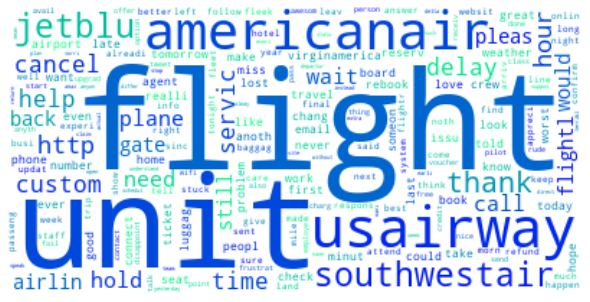

In [16]:
tokens_to_wordcloud = []
for a in dataset_tweets['text']:
    tokens_to_wordcloud+=text_tokenizer(a)
bow_txt=create_bow(tokens_to_wordcloud)

wordcloud = WordCloud(colormap='winter', background_color="white").generate_from_frequencies(bow_txt)
plt.figure(figsize=(8, 12), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig("wordcloud_project.jpg")
plt.show()

### Analise neutral sentiment tweets

In [17]:
df_neut=dataset_tweets[dataset_tweets['airline_sentiment']=='neutral']

Display top 10 tokens
['pleas', 'need', 'http', 'southwestair', 'usairway', 'jetblu', 'unit', 'thank', 'flight', 'americanair']


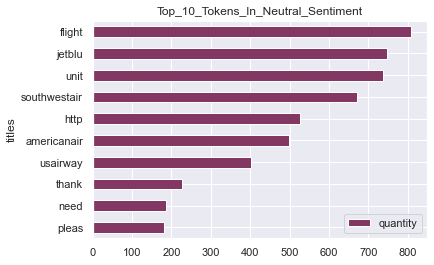

+----+--------------+------------+
|    | titles       |   quantity |
|----+--------------+------------|
|  0 | pleas        |        182 |
|  1 | need         |        186 |
|  7 | thank        |        227 |
|  4 | usairway     |        402 |
|  9 | americanair  |        499 |
|  2 | http         |        526 |
|  3 | southwestair |        671 |
|  6 | unit         |        738 |
|  5 | jetblu       |        748 |
|  8 | flight       |        809 |
+----+--------------+------------+


In [18]:
Top10_OneSet(df_neut['text'],"Top_10_Tokens_In_Neutral_Sentiment","Top_10_Tokens")

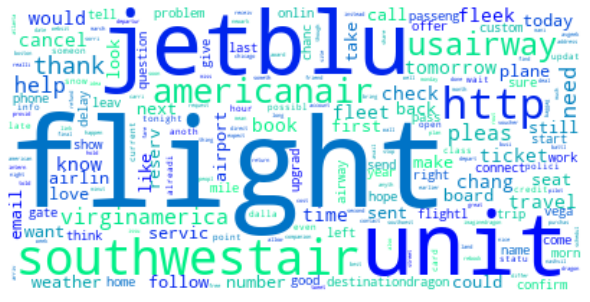

In [19]:
tokens_to_wordcloud = []
for a in df_neut['text']:
    tokens_to_wordcloud+=text_tokenizer(a)
bow_txt=create_bow(tokens_to_wordcloud)

wordcloud = WordCloud(colormap='winter', background_color="white").generate_from_frequencies(bow_txt)
plt.figure(figsize=(8, 12), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig("wordcloud_project.jpg")
plt.show()

### Analise positive sentiment tweets

In [20]:
df_posi=dataset_tweets[dataset_tweets['airline_sentiment']=='positive']
df_posi_vector, df_posi_1 = vectorizing(df_posi['text'])

Display top 10 tokens
['love', 'americanair', 'unit', 'great', 'flight', 'usairway', 'http', 'southwestair', 'jetblu', 'thank']


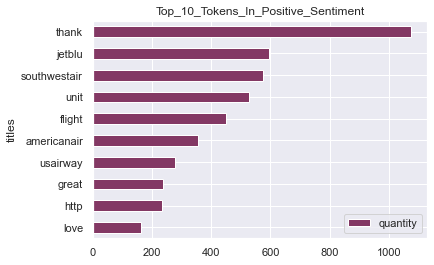

+----+--------------+------------+
|    | titles       |   quantity |
|----+--------------+------------|
|  0 | love         |        165 |
|  6 | http         |        233 |
|  3 | great        |        236 |
|  5 | usairway     |        277 |
|  1 | americanair  |        355 |
|  4 | flight       |        450 |
|  2 | unit         |        529 |
|  7 | southwestair |        576 |
|  8 | jetblu       |        595 |
|  9 | thank        |       1076 |
+----+--------------+------------+


In [21]:
Top10_OneSet(df_posi['text'],"Top_10_Tokens_In_Positive_Sentiment","Top_10_Tokens")

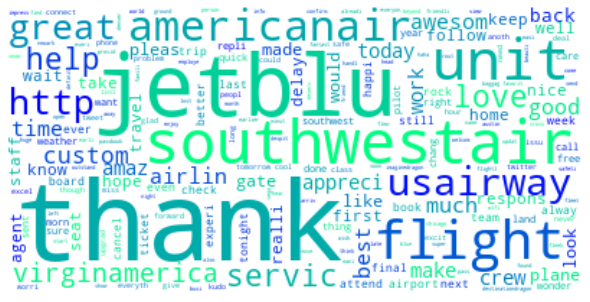

In [22]:
tokens_to_wordcloud = []
for a in df_posi['text']:
    tokens_to_wordcloud+=text_tokenizer(a)
bow_txt=create_bow(tokens_to_wordcloud)

wordcloud = WordCloud(colormap='winter', background_color="white").generate_from_frequencies(bow_txt)
plt.figure(figsize=(8, 12), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig("wordcloud_project.jpg")
plt.show()

### Analise negative sentiment tweets

In [23]:
df_nega=dataset_tweets[dataset_tweets['airline_sentiment']=='negative']
df_nega_vector, df_nega_1 = vectorizing(df_nega['text'])

Display top 10 tokens
['custom', 'delay', 'jetblu', 'americanair', 'cancel', 'southwestair', 'hour', 'usairway', 'unit', 'flight']


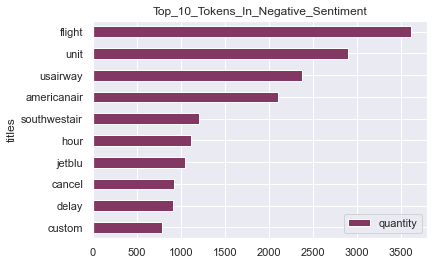

+----+--------------+------------+
|    | titles       |   quantity |
|----+--------------+------------|
|  0 | custom       |        785 |
|  1 | delay        |        917 |
|  4 | cancel       |        926 |
|  2 | jetblu       |       1053 |
|  6 | hour         |       1113 |
|  5 | southwestair |       1214 |
|  3 | americanair  |       2110 |
|  7 | usairway     |       2375 |
|  8 | unit         |       2899 |
|  9 | flight       |       3621 |
+----+--------------+------------+


In [24]:
Top10_OneSet(df_nega['text'],"Top_10_Tokens_In_Negative_Sentiment","Top_10_Tokens")

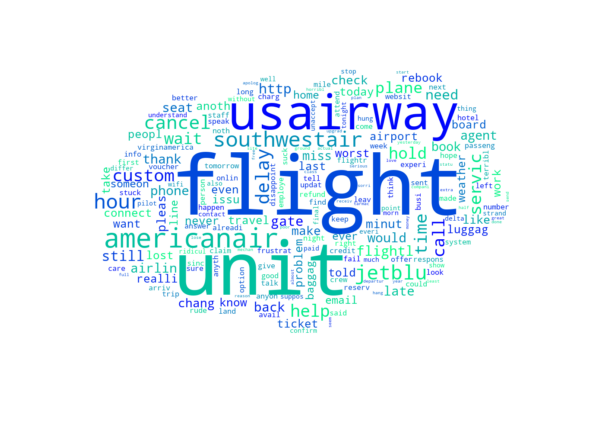

In [25]:
tokens_to_wordcloud = []
for a in df_nega['text']:
    tokens_to_wordcloud+=text_tokenizer(a)
bow_txt=create_bow(tokens_to_wordcloud)

wordcloud = WordCloud(colormap='winter', background_color="white").generate_from_frequencies(bow_txt)
plt.figure(figsize=(8, 12), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig("wordcloud_project.jpg")
plt.show()

### Distribution of sentiments

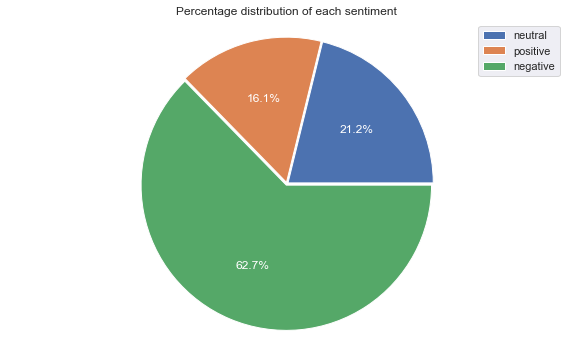

In [26]:
plt.figure(figsize=(10,6))
explode = (0.01,0.01,0.01)
plt.pie([len(df_neut),len(df_posi),len(df_nega)], labels=['neutral','positive','negative'],autopct='%.1f%%', textprops={'color':"w"}, explode = explode)
plt.legend(loc='upper right')
plt.axis('equal')
plt.title("Percentage distribution of each sentiment")
plt.show()

## Classification

### Prepare sets for classification

In [27]:
X_train, X_test, y_train, y_test = train_test_split(dataset_tweets['text'], dataset_tweets['airline_sentiment'], test_size=0.33,
                                                    random_state=42)

X_train_vector, X_train_titles = vectorizing_voc(X_train, dataset_tweets_1)
X_test_vector, X_test_titles = vectorizing_voc(X_test, dataset_tweets_1)

### Decision Tree Classifier

Accuracy DTC: 0.6885347682119205


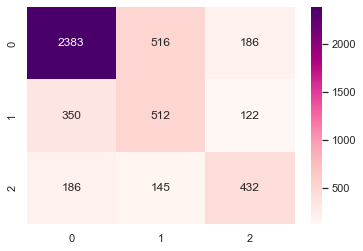

In [28]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train_vector, y_train)
y_pred = DTC.predict(X_test_vector)
print("Accuracy DTC:", metrics.accuracy_score(y_test, y_pred))
#print("Accuracy another way:", DTC.score(X_test_vector, y_test))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),cmap="RdPu",annot=True,fmt="d")

In [29]:
print(f'DTC model \n {classification_report(y_test, y_pred)}')

DTC model 
               precision    recall  f1-score   support

    negative       0.82      0.77      0.79      3085
     neutral       0.44      0.52      0.47       984
    positive       0.58      0.57      0.57       763

    accuracy                           0.69      4832
   macro avg       0.61      0.62      0.61      4832
weighted avg       0.70      0.69      0.69      4832



Z takich wyników klasyfikacji za pomoca drzewa decyzyjnego możemy odczytać, że:
   <li>Doładność klasyfikacji jest na poziomie 0.6885. Co oznacza, że 69% obserwacji ze zbioru testowego zostało sklasyfikowanych poprawnie</li>
   <li>Z otrzymanej heatmapy, możemy zauważyć, że klasyfikaor daje najlepsze wyniki dla tweetów o sentymencie negatywnym. Wynika to najpewniej z faktu, że liczba takich tweetów jest największa. </li>
   <li> Co ciekawe precyzja, dla tweetów o sentymencie neutralnym jest niższa niż dla tych pozytywnych, mimo, że zbiór tweetów neutralnych był większy (w całości, nie wiadomo co trafiło do testowego, a co do uczącego zbioru). Moim pomysłem, z czego to wynika jest fakt, że neutralne tweety mogą zawierać więcej różnorodnego słownictwa. </li>


### KNN Classifier

Accuracy KNN: 0.5283526490066225


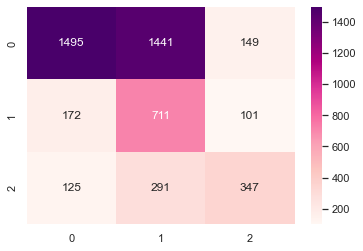

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_vector, y_train)
y_pred = classifier.predict(X_test_vector)

print("Accuracy KNN:", metrics.accuracy_score(y_test, y_pred))
#print("Accuracy another way:", classifier.score(X_test_vector, y_test))

ax = sns.heatmap(confusion_matrix(y_test, y_pred),cmap="RdPu",annot=True,fmt="d")

In [31]:
print(f'KNN model \n {classification_report(y_test, y_pred)}')

KNN model 
               precision    recall  f1-score   support

    negative       0.83      0.48      0.61      3085
     neutral       0.29      0.72      0.41       984
    positive       0.58      0.45      0.51       763

    accuracy                           0.53      4832
   macro avg       0.57      0.55      0.51      4832
weighted avg       0.68      0.53      0.56      4832



Dla klasyfikatora KNN można wysnuć następujące wnioski:
<li> Jest on gorszym klasyfikatorem dla tego zbioru danych, niż drzewo decyzyjne. Ma niższą wartość precyzji.. </li>
<li> Dla tweetów negatywtynych jest podobnie dobry, jednakże dla tych neutralnych znacząco gorszy.   </li>
<li> Wsparcie wskazuje nam w ile dokumentów( wierszy) było z konkretnym nacechowaniem. Widać, że najwięcej jest tweetów negatywnych 3085, kolejno nautralnych 984 i pozytywnych 763.  </li>
<li> Recall, czyli czułość. Mówi o tym, ile procent wszystkich, które powinny zostać rozpoznane. Stanowią te rozpoznane jako prawdziwe w zbiorze danych oraz w klasyfikatorze </li>